In [1]:
from __future__ import annotations

from helper import generate_2d_ising_observable_data, generate_heisenberg_observable_data, plot_bond_heatmaps, generate_periodic_heisenberg_observable_data

Define parameters

In [2]:
J = 1
g = 1
dt = 0.1
num_qubits = 16
pad = 1

min_bond = 2
max_bonds = [512]
thresholds = [0]
timesteps_list = [*range(1, 11)]

In [3]:
results = generate_heisenberg_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list, min_bond)

Timesteps 1
TDVP: (-2.168404344971009e-17+0j)
TEBD: -4.774284605051674e-15
Timesteps 2
TDVP: (-0.01685443565792886+0j)
TEBD: -0.016854435646298106
Timesteps 3
TDVP: (-0.03824367244348216+0j)
TEBD: -0.03824367236005072
Timesteps 4
TDVP: (-0.041257513893097224+0j)
TEBD: -0.04125751318861091
Timesteps 5
TDVP: (-0.03098658770263689+0j)
TEBD: -0.030986588710308065
Timesteps 6
TDVP: (-0.020055489938678464+0j)
TEBD: -0.020055495211617598
Timesteps 7
TDVP: (-0.007423645238094509+0j)
TEBD: -0.0074236494636266415
Timesteps 8
TDVP: (0.006296018154598733+0j)
TEBD: 0.006296017796339532
Timesteps 9
TDVP: (0.015088824787231392+0j)
TEBD: 0.015088832391455025
Timesteps 10
TDVP: (0.018947606408124422+0j)
TEBD: 0.01894762817955272


In [ ]:
plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)

NameError: name 'results' is not defined

In [ ]:
min_bond = 16
timesteps_list = [*range(1, 11)]
results = generate_periodic_heisenberg_observable_data(num_qubits, J, g, dt, pad, thresholds, max_bonds, timesteps_list, min_bond)

Timesteps 1
TDVP: (5.5376710161869624e-14+0j)
TEBD: -3.828228832924876e-13
Timesteps 2
TDVP: (-0.01685443571002214+0j)
TEBD: -0.0168544356285365
Timesteps 3
TDVP: (-0.03824367216169753+0j)
TEBD: -0.03824367211984104
Timesteps 4
TDVP: (-0.041257501896981366+0j)
TEBD: -0.04125750176541492
Timesteps 5
TDVP: (-0.030986571112054644+0j)
TEBD: -0.0309865656662988
Timesteps 6
TDVP: (-0.020055713205642374+0j)
TEBD: -0.02005566783154981
Timesteps 7
TDVP: (-0.007424791695718698+0j)
TEBD: -0.007424718078140198
Timesteps 8
TDVP: (0.006289473845723069+0j)
TEBD: 0.006289204826988945
Timesteps 9
TDVP: (0.01506680209778652+0j)
TEBD: 0.015065945333283344
Timesteps 10
TDVP: (0.018953745951855866+0j)
TEBD: 0.018954215331758683


[0.57394366 1.05901639 1.08823529 1.0831643  1.05366726 1.0410509
 1.02790698 1.02089552 1.01603499 1.01001431]


c:\Users\aaron\OneDrive\Documents\GitHub\mqt-yaqs\scripts\bond_dimension\helper.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


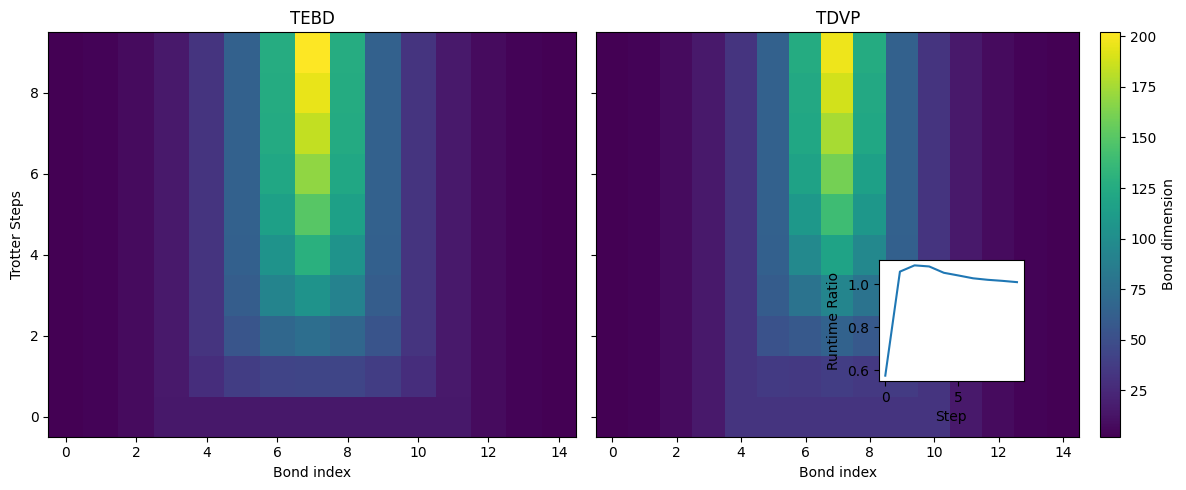

In [7]:
plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)

In [3]:
J = 1
g = 1
dt = 0.1
num_rows = 4
num_cols = 4
pad = 1

min_bond = 16
timesteps_list = [*range(1, 11)]
results = generate_2d_ising_observable_data(num_rows, num_cols, J, g, dt, pad, thresholds, max_bonds, timesteps_list, min_bond)

Timesteps 1
TDVP: (0.008340666306021477+0j)
TEBD: 0.008340666286879364
Timesteps 2
TDVP: (0.06060056130643706+0j)
TEBD: 0.06060056094025137
Timesteps 3
TDVP: (0.15891875663794008+0j)
TEBD: 0.1589187563186177
Timesteps 4
TDVP: (0.2506519994202369+0j)
TEBD: 0.2506520021911558
Timesteps 5
TDVP: (0.28142075995710614+0j)
TEBD: 0.2814207669141974
Timesteps 6
TDVP: (0.24188226908505742+0j)
TEBD: 0.24188227094161022
Timesteps 7
TDVP: (0.16522088022486323+0j)
TEBD: 0.1652208749026799
Timesteps 8
TDVP: (0.09988707427801463+0j)
TEBD: 0.09988708921879835
Timesteps 9
TDVP: (0.08282222714329299+0j)
TEBD: 0.08282228894795965
Timesteps 10
TDVP: (0.1197605701727013+0j)
TEBD: 0.11976065348993836


[0.72674419 1.07821229 1.20869565 1.26072607 1.16216216 1.11516315
 1.05414013 1.02890173 1.01088435 1.00532623]


c:\Users\aaron\OneDrive\Documents\GitHub\mqt-yaqs\scripts\bond_dimension\helper.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


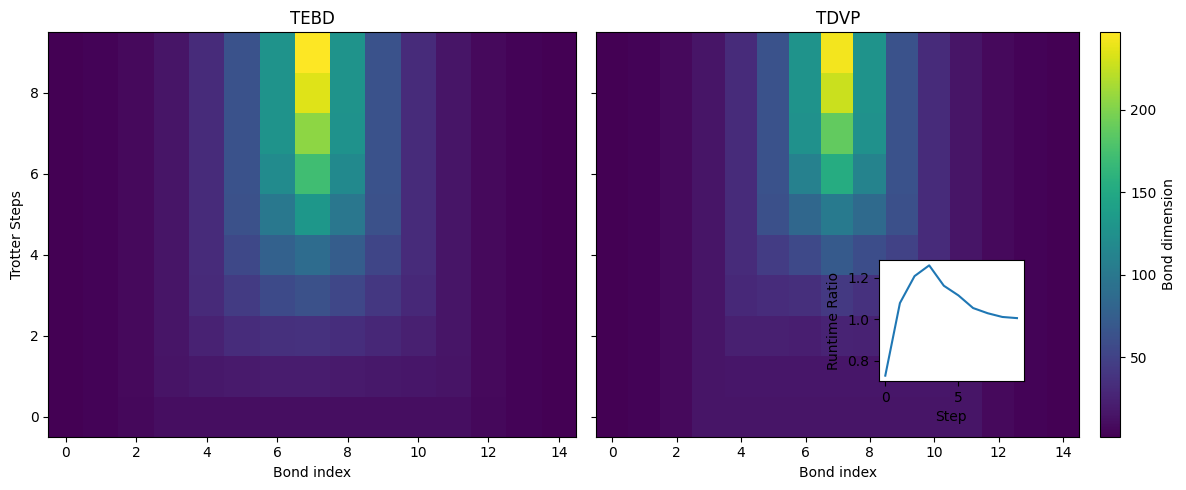

In [4]:
plot_bond_heatmaps(results, bond_dim=max_bonds[0], threshold=0)